<a href="https://colab.research.google.com/github/allydrzewo/CS370-Assignments/blob/main/assignment-1/Assignment1A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

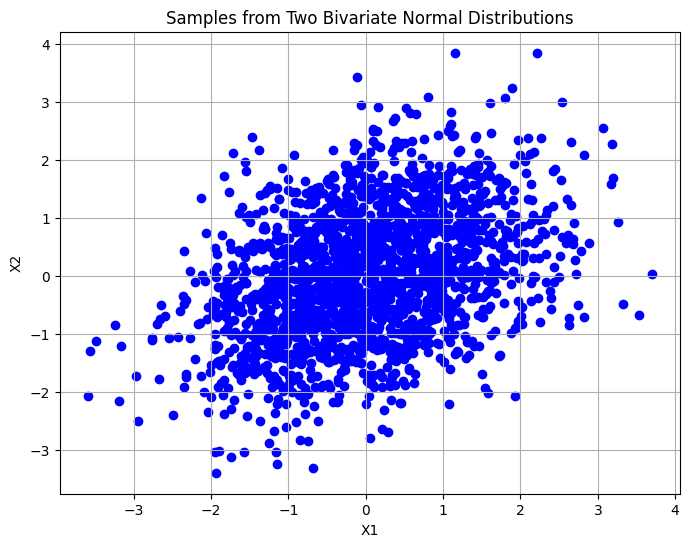

Shape of the stacked tensor: torch.Size([2000, 2])


In [4]:
import torch
import matplotlib.pyplot as plt

# Define the means and covariance matrices
mean_A = torch.tensor([-0.5, -0.5])
cov_A = torch.tensor([[1.0, 0.25], [0.25, 1.0]])

mean_B = torch.tensor([0.5, 0.5])
cov_B = torch.tensor([[1.0, 0.25], [0.25, 1.0]])

# Create Multivariate Normal distributions
dist_A = torch.distributions.MultivariateNormal(mean_A, cov_A)
dist_B = torch.distributions.MultivariateNormal(mean_B, cov_B)

# Generate samples
num_samples = 1000
samples_A = dist_A.sample((num_samples,))
samples_B = dist_B.sample((num_samples,))

# Plot the samples
plt.figure(figsize=(8, 6))
plt.scatter(samples_A[:, 0], samples_A[:, 1], c='blue', label='Distribution A')
plt.scatter(samples_B[:, 0], samples_B[:, 1], c='blue', label='Distribution B')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Samples from Two Bivariate Normal Distributions')
plt.grid(True)
plt.show()

# Stack samples into a single tensor
X = torch.cat((samples_A, samples_B), dim=0)
print("Shape of the stacked tensor:", X.shape)

Dataset shape: torch.Size([2000, 2])
Centroids:
tensor([[0.4844, 0.1959],
        [0.7714, 0.6872],
        [0.2386, 0.6822]])
Assignments:
tensor([0, 1, 1,  ..., 2, 1, 1])


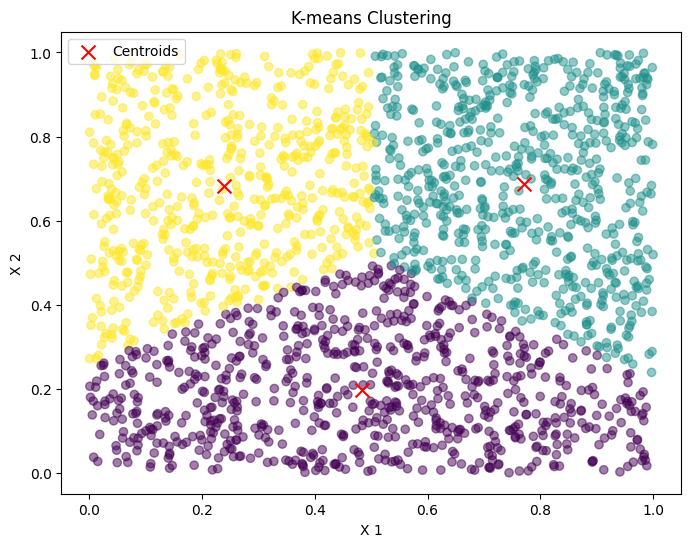

In [16]:
import torch
import pandas as pd
import numpy as np
from torch.distributions.multivariate_normal import MultivariateNormal

# Parameters for the Gaussian distributions
mean_A = torch.tensor([-0.5, -0.5])
sigma_A = torch.tensor([[1, 0.25], [0.25, 1]])

mean_B = torch.tensor([0.5, 0.5])
sigma_B = torch.tensor([[1, 0.25], [0.25, 1]])

# Number of samples from each distribution
num_samples_per_distribution = 1000

# Generate samples from each distribution
dist_A = MultivariateNormal(mean_A, sigma_A)
samples_A = dist_A.sample((num_samples_per_distribution,))

dist_B = MultivariateNormal(mean_B, sigma_B)
samples_B = dist_B.sample((num_samples_per_distribution,))

# Combine samples into one dataset
data = torch.cat([samples_A, samples_B], dim=0)

print(f"Dataset shape: {data.shape}")

def k_means(data, k, num_iters=100):
    # Randomly initialize centroids
    centroids = data[torch.randperm(data.size(0))[:k]]

    for _ in range(num_iters):
        # Compute distances from each point to each centroid
        distances = torch.cdist(data, centroids)

        # Assign each point to the nearest centroid
        assignments = torch.argmin(distances, dim=1)

        # Update centroids
        new_centroids = torch.stack([data[assignments == i].mean(dim=0) for i in range(k)])

        # Check for convergence (if centroids haven't changed)
        if torch.allclose(new_centroids, centroids):
            break

        centroids = new_centroids

    return centroids, assignments

data = torch.rand(2000, 2)
k = 3  # Number of clusters
centroids, assignments = k_means(data, k)

print(f"Centroids:\n{centroids}")
print(f"Assignments:\n{assignments}")

def plot_clusters(data, assignments, centroids):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=assignments, cmap='viridis', alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
    plt.xlabel('X 1')
    plt.ylabel('X 2')
    plt.title('K-means Clustering')
    plt.legend()
    plt.show()

plot_clusters(data, assignments, centroids)

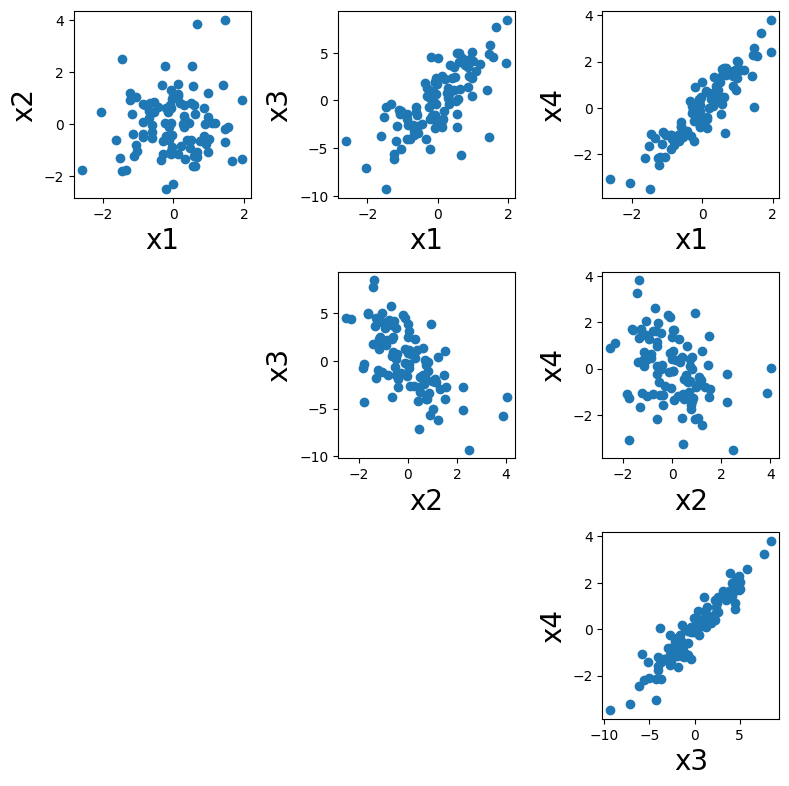

Principal component 0
tensor([ 0.1727, -0.1906,  0.8972,  0.3588])

Principal component 1
tensor([ 0.5035,  0.7828, -0.0738,  0.3580])

Principal component 2
tensor([ 0.1651,  0.3196,  0.3774, -0.8533])

Principal component 3
tensor([ 0.8303, -0.4987, -0.2170, -0.1221])

Principal component 0 (SVD built-in)
tensor([ 0.1727,  0.5035, -0.1651,  0.8303])

Principal component 1 (SVD built-in)
tensor([-0.1906,  0.7828, -0.3196, -0.4987])

Principal component 2 (SVD built-in)
tensor([ 0.8972, -0.0738, -0.3774, -0.2170])

Principal component 3 (SVD built-in)
tensor([ 0.3588,  0.3580,  0.8533, -0.1221])

Principal components by hand (Eigen decomposition):
tensor([[ 0.1727,  0.5035,  0.1651,  0.8303],
        [-0.1906,  0.7828,  0.3196, -0.4987],
        [ 0.8972, -0.0738,  0.3774, -0.2170],
        [ 0.3588,  0.3580, -0.8533, -0.1221]])

Principal components from SVD (built-in):
tensor([[ 0.1727, -0.1906,  0.8972,  0.3588],
        [ 0.5035,  0.7828, -0.0738,  0.3580],
        [-0.1651, -0.319

In [1]:
import torch
import matplotlib.pyplot as plt

# Step 1: Generate data
torch.manual_seed(0)
X = torch.normal(0, 1, size=(100, 4))
X[:, 2] = 3 * X[:, 0] - 2 * X[:, 1] + torch.normal(0, 0.1, size=(100,))
X[:, 3] = 1.5 * X[:, 0] - 0.5 * X[:, 1] + torch.normal(0, 0.1, size=(100,))

# Center the data (zero mean)
X = X - X.mean(dim=0)

# Step 2: Plot pairwise scatter plots
plt.figure(figsize=(10, 10))
for i in range(4):
    for j in range(4):
        if j > i:
            plt.subplot(4, 4, i*4 + j + 1)
            plt.scatter(X[:, i].numpy(), X[:, j].numpy())
            plt.xlabel(f'x{i+1}', fontsize=20)
            plt.ylabel(f'x{j+1}', fontsize=20)
plt.tight_layout()
plt.show()

# Step 3: Compute the covariance matrix (similar to PCA.fit)
cov_matrix = X.T @ X / (X.size(0) - 1)  # Covariance matrix with unbiased estimate

# Step 4: Perform eigen decomposition
eigvals, eigvecs = torch.linalg.eig(cov_matrix)
eigvals = eigvals.real  # Discard imaginary part
eigvecs = eigvecs.real  # Discard imaginary part

# Step 5: Sort eigenvalues and eigenvectors by magnitude
ordering = torch.argsort(eigvals, descending=True)
principal_comps_byhand = eigvecs[:, ordering]

# Step 6: Print principal components from manual computation
for i, component in enumerate(principal_comps_byhand.T):
    print(f'Principal component {i}')
    print(component)
    print()

# Step 7: Compare with PyTorch PCA (similar to PCA from sklearn)
U, S, V = torch.svd(X)  # SVD gives us the principal components
principal_comps_builtin = V.T

# Step 8: Print principal components from built-in SVD
for i, component in enumerate(principal_comps_builtin.T):
    print(f'Principal component {i} (SVD built-in)')
    print(component)
    print()

# Step 9: Compare both results
print("Principal components by hand (Eigen decomposition):")
print(principal_comps_byhand)

print("\nPrincipal components from SVD (built-in):")
print(principal_comps_builtin)